**Diabetes Classification**

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('kaggle_diabetes.csv')

**Exploring the dataset**

In [3]:
#rows and columns of the dataset
df.shape

(2000, 8)

In [4]:
# Column names
df.columns

Index(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
#datatypes for each columns
df.dtypes

Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [6]:
# Returns the first x number of rows 
df.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,138,62,35,0,33.6,0.127,47,1
1,84,82,31,125,38.2,0.233,23,0
2,145,0,0,0,44.2,0.630,31,1
3,135,68,42,250,42.3,0.365,24,1
4,139,62,41,480,40.7,0.536,21,0


In [7]:
# Returns basic information on all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   2000 non-null   int64  
 1   BloodPressure             2000 non-null   int64  
 2   SkinThickness             2000 non-null   int64  
 3   Insulin                   2000 non-null   int64  
 4   BMI                       2000 non-null   float64
 5   DiabetesPedigreeFunction  2000 non-null   float64
 6   Age                       2000 non-null   int64  
 7   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 125.1 KB


In [9]:
# Returns basic statistics on numeric columns
df.describe()

,count,mean,std,min,25%,50%,75%,max
Glucose,2000.0,121.18250,32.068636,0.000,99.000,117.000,141.000,199.00
BloodPressure,2000.0,69.14550,19.188315,0.000,63.500,72.000,80.000,122.00
SkinThickness,2000.0,20.93500,16.103243,0.000,0.000,23.000,32.000,110.00
Insulin,2000.0,80.25400,111.180534,0.000,0.000,40.000,130.000,744.00
BMI,2000.0,32.19300,8.149901,0.000,27.375,32.300,36.800,80.60
DiabetesPedigreeFunction,2000.0,0.47093,0.323553,0.078,0.244,0.376,0.624,2.42
Age,2000.0,33.09050,11.786423,21.000,24.000,29.000,40.000,81.00
Outcome,2000.0,0.34200,0.474498,0.000,0.000,0.000,1.000,1.00


In [10]:
# Know null values
df.isnull().any()

Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [11]:
df = df.rename(columns={'DiabetesPedigreeFunction':'DPF'})
df.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,138,62,35,0,33.6,0.127,47,1
1,84,82,31,125,38.2,0.233,23,0
2,145,0,0,0,44.2,0.630,31,1
3,135,68,42,250,42.3,0.365,24,1
4,139,62,41,480,40.7,0.536,21,0


In [12]:
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

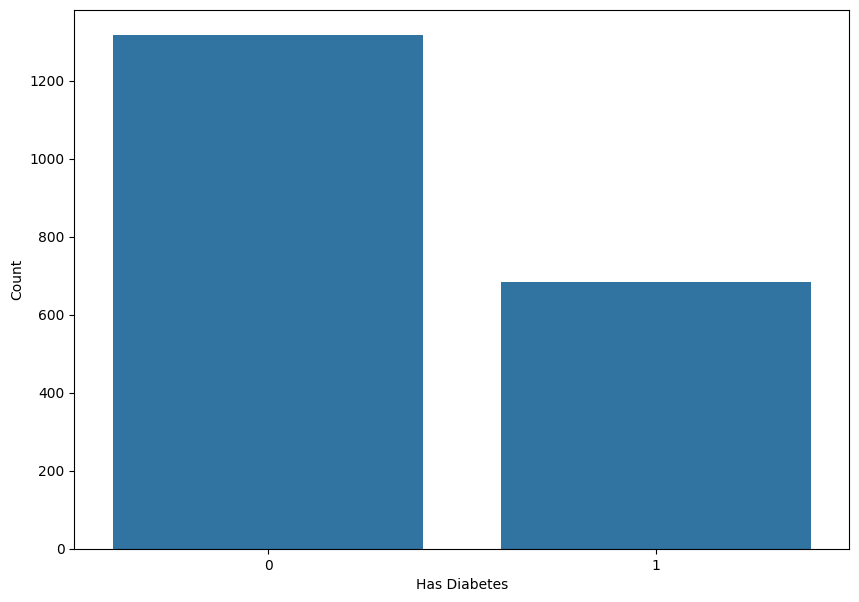

In [13]:
# Plotting the Outcomes based on the number of dataset entries
plt.figure(figsize=(10,7))
sns.countplot(x='Outcome', data=df)

# Headings
plt.xlabel('Has Diabetes')
plt.ylabel('Count')

plt.show()

**Data Cleaning**

In [14]:
df_copy = df.copy(deep=True)
df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
df_copy.isnull().sum()

Glucose           13
BloodPressure     90
SkinThickness    573
Insulin          956
BMI               28
DPF                0
Age                0
Outcome            0
dtype: int64

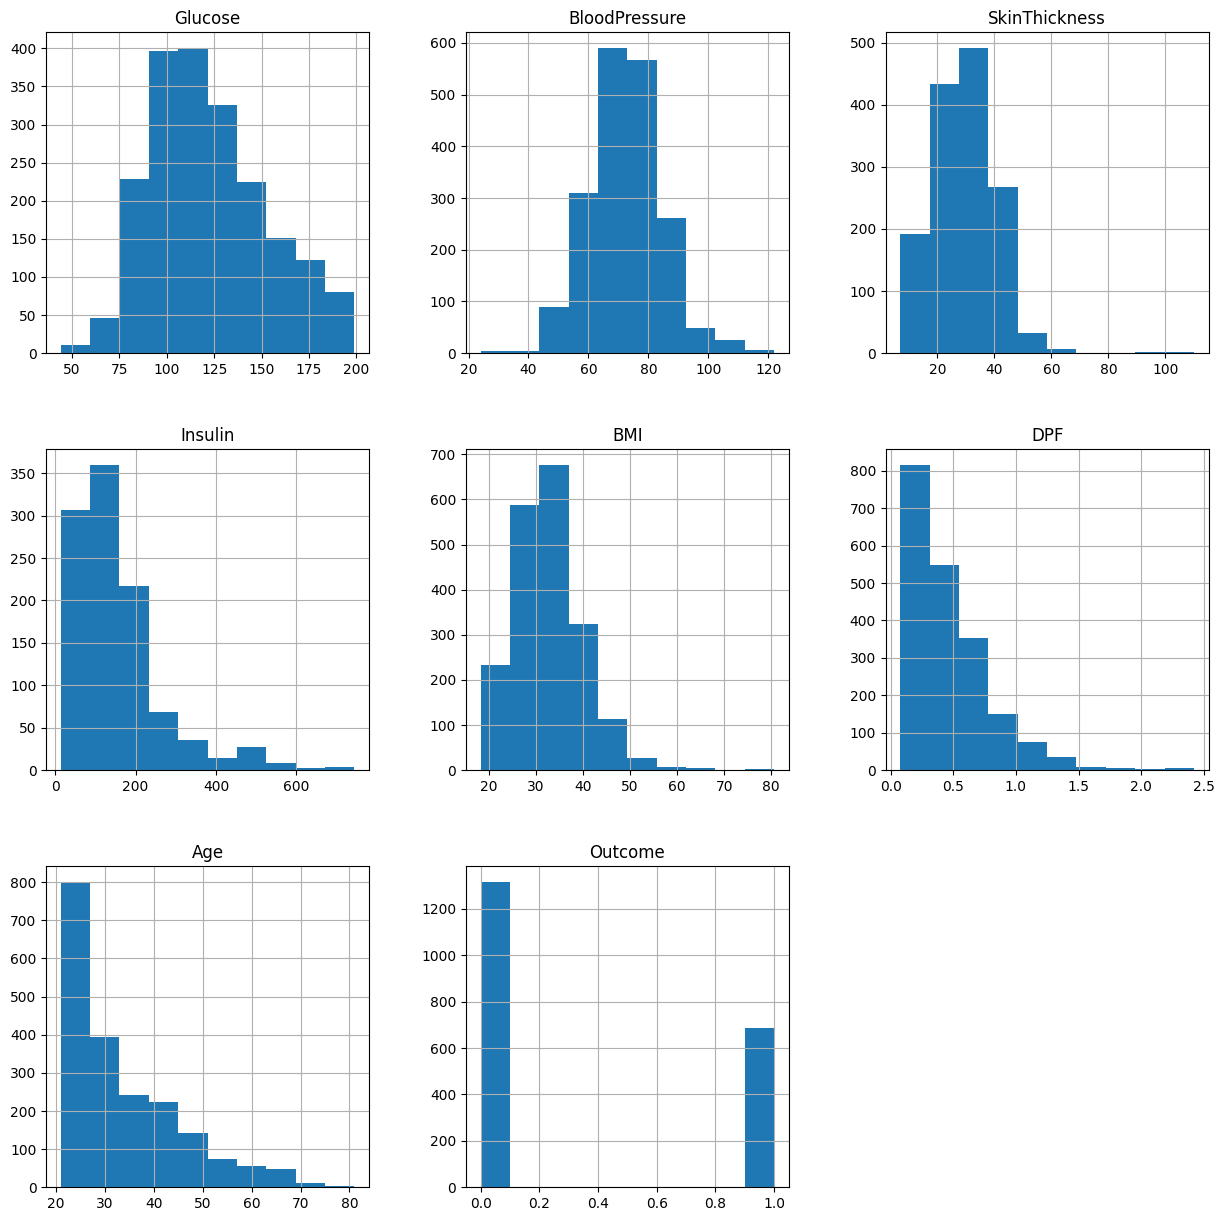

In [15]:
# To fill these Nan values the data distribution needs to be understood
# Plotting histogram of dataset before replacing NaN values
p = df_copy.hist(figsize = (15,15))

In [16]:
# Replacing NaN value by mean, median depending upon distribution
df_copy['Glucose'].fillna(df_copy['Glucose'].mean(), inplace=True)
df_copy['BloodPressure'].fillna(df_copy['BloodPressure'].mean(), inplace=True)
df_copy['SkinThickness'].fillna(df_copy['SkinThickness'].median(), inplace=True)
df_copy['Insulin'].fillna(df_copy['Insulin'].median(), inplace=True)
df_copy['BMI'].fillna(df_copy['BMI'].median(), inplace=True)

C:\Users\ioioi\AppData\Local\Temp\ipykernel_15388\587404965.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copy['Glucose'].fillna(df_copy['Glucose'].mean(), inplace=True)
C:\Users\ioioi\AppData\Local\Temp\ipykernel_15388\587404965.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

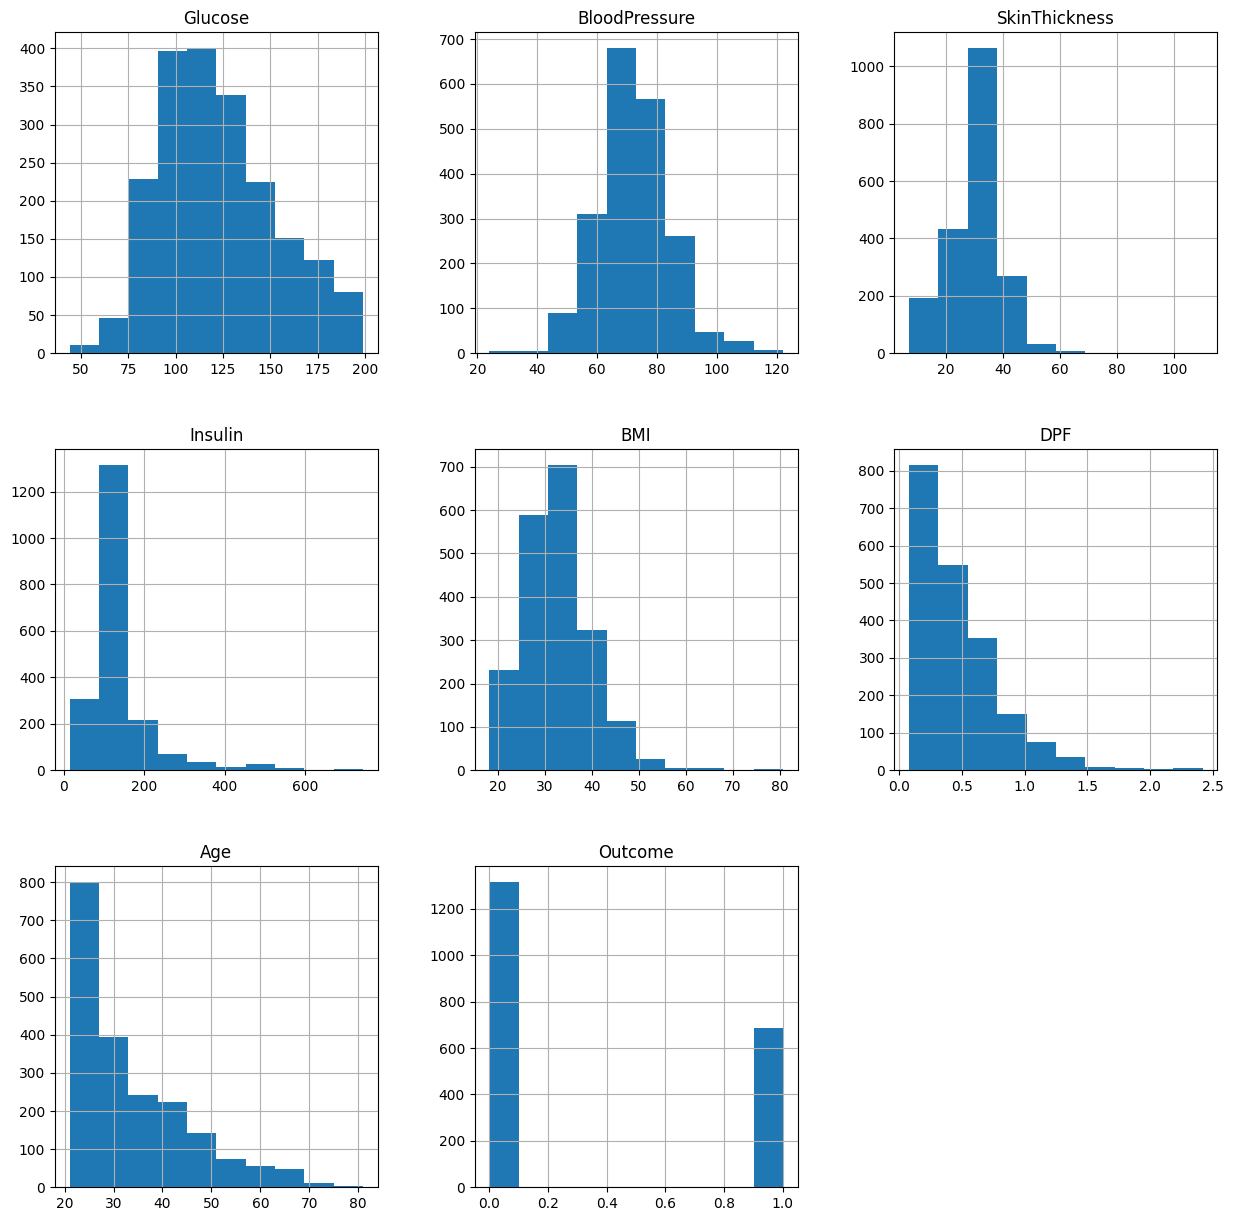

In [17]:
# Plotting histogram of dataset after replacing NaN values
p = df_copy.hist(figsize=(15,15))

In [18]:
df_copy.isnull().sum()

Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
DPF              0
Age              0
Outcome          0
dtype: int64

**Model Building**

In [19]:
from sklearn.model_selection import train_test_split

X = df.drop(columns='Outcome')
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
print('X_train size: {}, X_test size: {}'.format(X_train.shape, X_test.shape))

X_train size: (1600, 7), X_test size: (400, 7)


In [20]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [21]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [22]:
def find_all_algorithm_scores(X_train, y_train):
    algorithms = {
        'Logistic Regression': LogisticRegression(solver='lbfgs', multi_class='auto'),
        'Decision Tree': DecisionTreeClassifier(),
        'Random Forest': RandomForestClassifier(),
        'SVM': SVC(gamma='auto')
    }
    
    scores = {}
    
    for name, algorithm in algorithms.items():
        cv_scores = cross_val_score(algorithm, X_train, y_train, cv=5)
        scores[name] = cv_scores
    
    return scores

all_scores = find_all_algorithm_scores(X_train, y_train)

for algorithm, scores in all_scores.items():
    print("Algorithm:", algorithm)
    print("Cross-validated scores:", scores)
    print("Mean score:", scores.mean())
    print()

best_algorithm = max(all_scores, key=lambda k: all_scores[k].mean())
best_score = all_scores[best_algorithm].mean()

print("Best algorithm:", best_algorithm)
print("Cross-validated score:", best_score)

Algorithm: Logistic Regression
Cross-validated scores: [0.7860262  0.76419214 0.75545852 0.7860262  0.76754386 0.72368421
 0.79385965]
Mean score: 0.7681129680095437

Algorithm: Decision Tree
Cross-validated scores: [0.94759825 0.93449782 0.98253275 0.95633188 0.97368421 0.9254386
 0.96491228]
Mean score: 0.9549993980584649

Algorithm: Random Forest
Cross-validated scores: [0.9650655  0.95633188 0.96943231 0.94759825 0.98684211 0.93421053
 0.96929825]
Mean score: 0.9612541178273194

Algorithm: SVM
Cross-validated scores: [0.83406114 0.79912664 0.82532751 0.83842795 0.79824561 0.74122807
 0.84649123]
Mean score: 0.8118440205316785

Best algorithm: Random Forest
Cross-validated score: 0.9612541178273194


Since the Random Forest algorithm has the highest accuracy, we futher fine tune the model using hyperparameter optimization

In [23]:
# Creating Random Forest Model
classifier = RandomForestClassifier(n_estimators=20, random_state=0)
classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20, random_state=0)

**Model Evaluation**

In [24]:
# Creating a confusion matrix
from sklearn.metrics import confusion_matrix,accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[271,   1],
       [  5, 123]], dtype=int64)

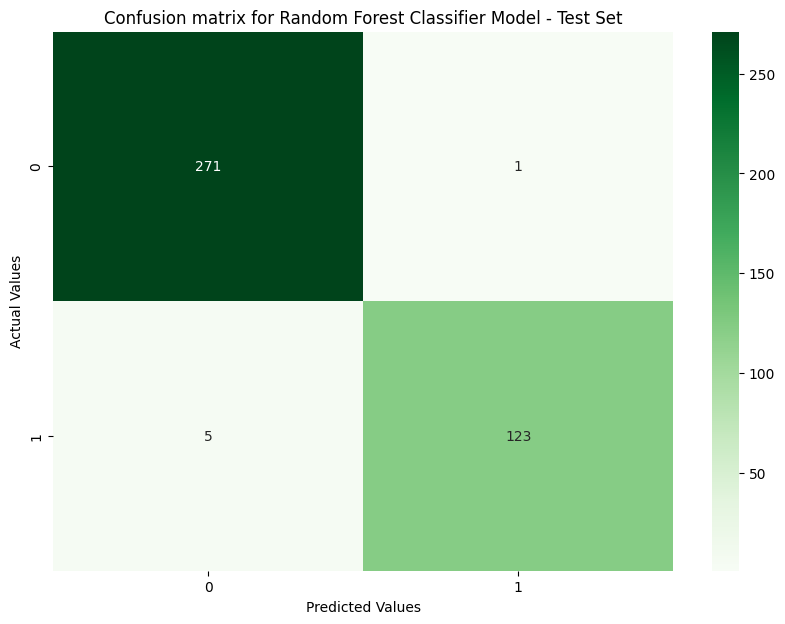

In [25]:
# Plotting the confusion matrix
plt.figure(figsize=(10,7))
p = sns.heatmap(cm, annot=True, cmap="Greens", fmt='g')
plt.title('Confusion matrix for Random Forest Classifier Model - Test Set')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [26]:
# Accuracy Score
score = round(accuracy_score(y_test, y_pred),4)*100
print("Accuracy on test set: {}%".format(score))

Accuracy on test set: 98.5%


In [27]:
# Creating a confusion matrix for training set
y_train_pred = classifier.predict(X_train)
cm = confusion_matrix(y_train, y_train_pred)
cm

array([[1044,    0],
       [   0,  556]], dtype=int64)

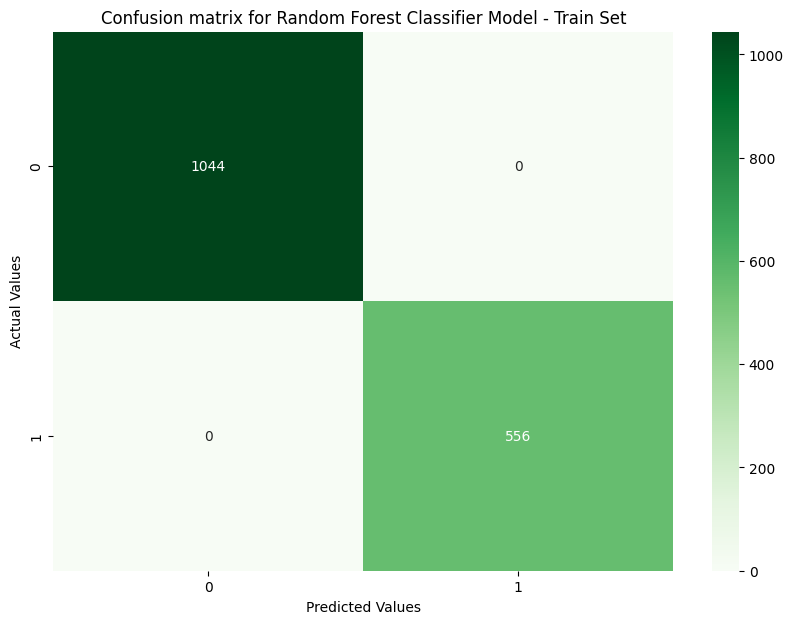

In [28]:
# Plotting the confusion matrix
plt.figure(figsize=(10,7))
p = sns.heatmap(cm, annot=True, cmap="Greens", fmt='g')
plt.title('Confusion matrix for Random Forest Classifier Model - Train Set')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [29]:
# Accuracy Score
score = round(accuracy_score(y_train, y_train_pred),4)*100
print("Accuracy on training set: {}%".format(score))

Accuracy on training set: 100.0%


# Predictions

In [30]:
# Creating a function for prediction
def predict_diabetes(Glucose, BloodPressure, SkinThickness, Insulin, BMI, DPF, Age):
    glucose = float(Glucose)
    bp = float(BloodPressure)
    st = float(SkinThickness)
    insulin = float(Insulin)
    bmi = float(BMI)
    dpf = float(DPF)
    age = int(Age)

    x = [[glucose, bp, st, insulin, bmi, dpf, age]]
    x = sc.transform(x)

    return classifier.predict(x)

In [31]:
# Prediction 1
# Input sequence: Glucose, BloodPressure, SkinThickness, Insulin, BMI, DPF, Age
prediction = predict_diabetes(81, 72, 15, 76, 30.1, 0.547, 25)[0]
if prediction:
  print('Oops! You have diabetes.')
else:
  print("Great! You don't have diabetes.")

Great! You don't have diabetes.


C:\Users\ioioi\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [32]:
# Prediction 2
# Input sequence: Glucose, BloodPressure, SkinThickness, Insulin, BMI, DPF, Age
prediction = predict_diabetes(117, 88, 24, 145, 34.5, 0.403, 40)[0]
if prediction:
  print('Oops! You have diabetes.')
else:
  print("Great! You don't have diabetes.")

Oops! You have diabetes.


C:\Users\ioioi\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [33]:
# Prediction 2
# Input sequence: Glucose, BloodPressure, SkinThickness, Insulin, BMI, DPF, Age
prediction = predict_diabetes(94, 64, 25, 79, 33.3, 0.738, 41)[0]
if prediction:
  print('Oops! You have diabetes.')
else:
  print("Great! You don't have diabetes.")

Great! You don't have diabetes.


C:\Users\ioioi\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
